In [1]:
import pandas as pd

# Load the new data
cleaned_data = pd.read_csv('10_training.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

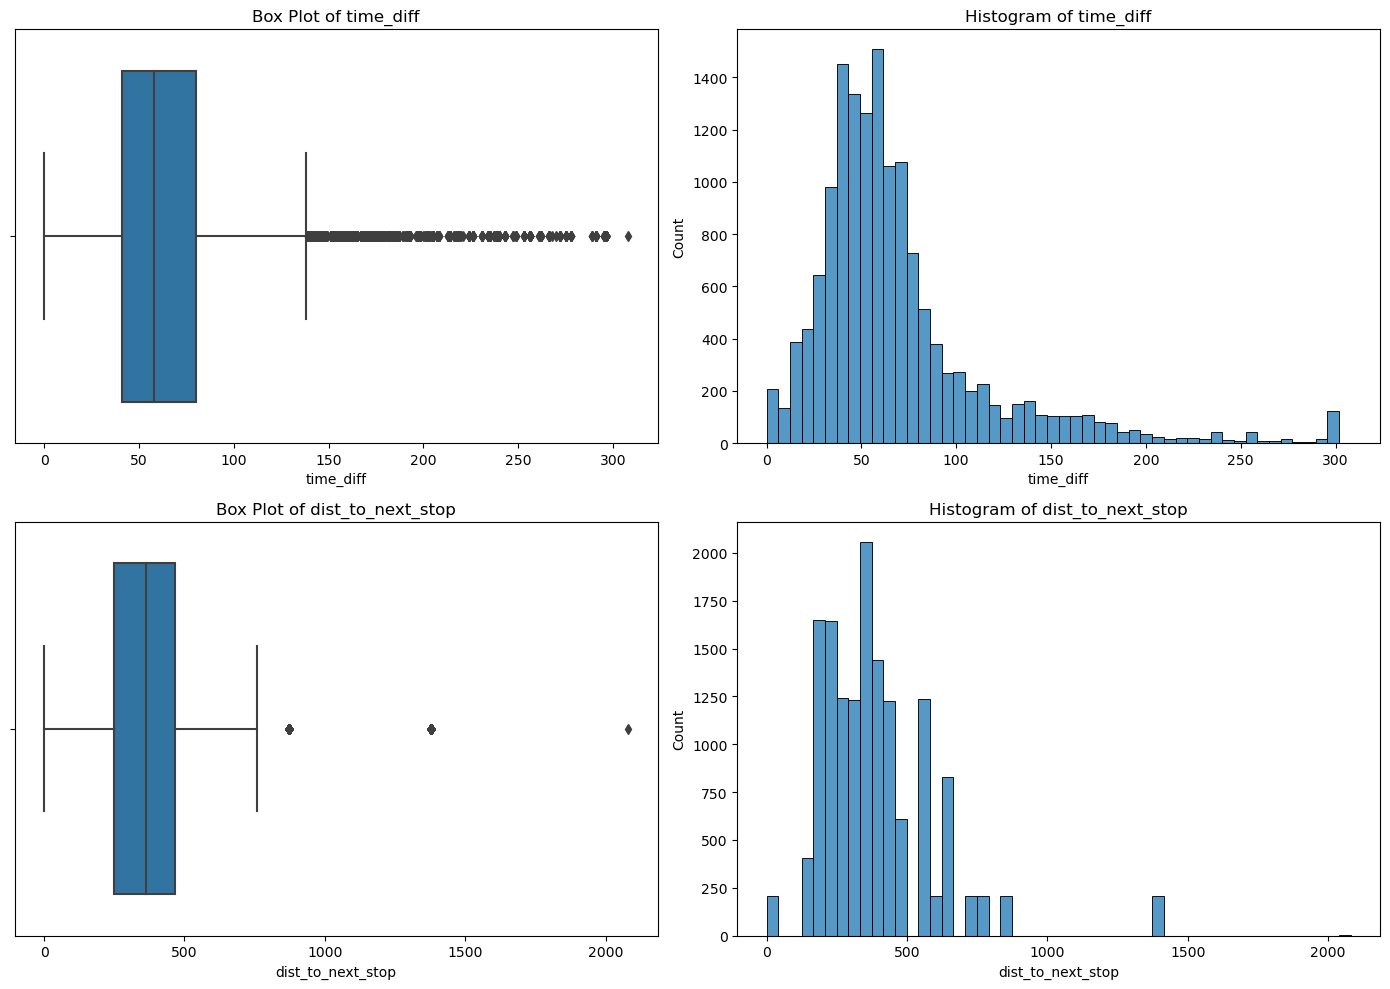

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for a 2x2 grid of plots
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Box plot for 'time_diff'
sns.boxplot(x=cleaned_data['time_diff'], ax=ax[0, 0])
ax[0, 0].set_title('Box Plot of time_diff')

# Histogram for 'time_diff'
sns.histplot(cleaned_data['time_diff'], bins=50, ax=ax[0, 1])
ax[0, 1].set_title('Histogram of time_diff')

# Box plot for 'dist_to_next_stop'
sns.boxplot(x=cleaned_data['dist_to_next_stop'], ax=ax[1, 0])
ax[1, 0].set_title('Box Plot of dist_to_next_stop')

# Histogram for 'dist_to_next_stop'
sns.histplot(cleaned_data['dist_to_next_stop'], bins=50, ax=ax[1, 1])
ax[1, 1].set_title('Histogram of dist_to_next_stop')

# Display the plots
plt.tight_layout()
plt.show()


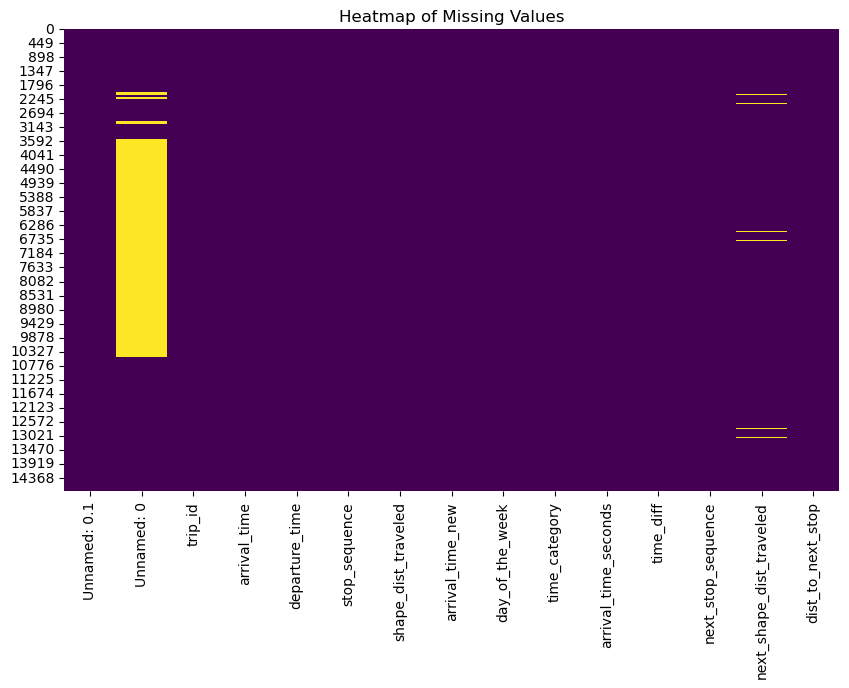

In [3]:
# Check for missing values
missing_values = cleaned_data.isna()

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [4]:
cleaned_data.fillna(0, inplace=True)

In [6]:
# Remove specified columns
columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'departure_time', 'shape_dist_traveled', 'arrival_time_seconds', 
                   'next_shape_dist_traveled']
cleaned_data = cleaned_data.drop(columns=columns_to_drop)

In [7]:
cleaned_data.to_csv("11_Master_Training.csv",index=False)

In [8]:
# Count unique 'trip_id' for each 'day_of_the_week'
unique_trip_ids = cleaned_data.groupby('day_of_the_week')['trip_id'].nunique()

print('Number of unique trip ids for each day of the week:\n', unique_trip_ids)

Number of unique trip ids for each day of the week:
 day_of_the_week
Friday       12
Monday       26
Saturday     46
Sunday       60
Thursday     21
Tuesday      21
Wednesday    22
Name: trip_id, dtype: int64


In [10]:
import numpy as np

# Ceil (round up) the 'dist_to_next_stop' values
cleaned_data['dist_to_next_stop'] = np.ceil(cleaned_data['dist_to_next_stop'])

# Remove the 'arrival_time' column
cleaned_data.drop('arrival_time', axis=1, inplace=True)

# Clip 'arrival_time_new' and remove the '0 days' part
cleaned_data['arrival_time_new'] = cleaned_data['arrival_time_new'].str.replace('0 days ', '')

# Convert 'arrival_time_new' to timedelta format
cleaned_data['arrival_time_new'] = pd.to_timedelta(cleaned_data['arrival_time_new'])

# Display the first few rows of the dataframe
cleaned_data.head()

,trip_id,stop_sequence,arrival_time_new,day_of_the_week,time_category,time_diff,next_stop_sequence,dist_to_next_stop
0,15351.y1002.60-145-b12-1.330.I,1,0 days 10:00:00,Saturday,Morning,138.0,2.0,449.0
1,15351.y1002.60-145-b12-1.330.I,2,0 days 10:02:18,Saturday,Morning,34.0,3.0,249.0
2,15351.y1002.60-145-b12-1.330.I,3,0 days 10:02:52,Saturday,Morning,67.0,4.0,491.0
3,15351.y1002.60-145-b12-1.330.I,4,0 days 10:03:59,Saturday,Morning,58.0,5.0,421.0
4,15351.y1002.60-145-b12-1.330.I,5,0 days 10:04:57,Saturday,Morning,57.0,6.0,484.0


In [11]:
cleaned_data.to_csv("master_final.csv")